In [1]:
library(data.table)
library(dplyr)
library(ggplot2)

Warning message:
"package 'data.table' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.2"------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Download the data
download.file(url='http://dvn-vm1.hmdc.harvard.edu/data/mysql/irclog/irclog.tsv', destfile='data/irclog.tsv')

In [3]:
df <- fread("data/irclog.tsv")

In [4]:
head(df,3)

id,channel,day,nick,timestamp,line,spam,in_summary
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,#dvn,2012-12-08,,1355005146,iqlogbot joined #dvn,0,0
2,#dvn,2012-12-08,,1355005248,Topic for #dvn is now http://thedata.org - The Dataverse Network Project | logs at http://irclog.iq.harvard.edu/dvn/today,0,0
3,#dvn,2012-12-08,pdurbin,1355005351,"hello! welcome to #dvn, an IRC channel on Freenode about The Dataverse Network Project, a web application for sharing, citing, analyzing, and preserving research data",0,0


In [5]:
#Convert day column to date format
df$day <- as.Date(df$day)

In [6]:
#Select a month and a year (write out the whole month name!)
#Try changing the month, and running all the code after it to view the output graph.
month <- 'April'
year <- 2019

In [7]:
#Filter out entries in selected month and year
df1 <- df %>% filter(months(df$day) == month & year(df$day) == year)

In [8]:
#Make a new table which lists each nickname and the number of messages issued by that nickname
chat.freq <- as.data.frame(table(df1$nick))

In [9]:
#Sort nicknames based on frequency
chat.freq.sorted <- chat.freq[order(-chat.freq$Freq),]

In [10]:
#Notice the numerous entries associated with no nickname (Row 1).
head(chat.freq.sorted)

,Var1,Freq
,<fct>,<int>
20,pdurbin,979
22,poikilotherm,507
1,,376
9,donsizemore,345
17,larsks,45
18,MrK,41


In [11]:
# Remove any entries with blank nickname
chat.freq.sorted <- chat.freq.sorted[chat.freq.sorted$Var1!="",]

In [12]:
#Filter out the top 25 (or less if there are less than 25 nicknames)
superusers <- chat.freq.sorted[1:min(length(chat.freq.sorted$Var1),25),]

In [13]:
#Order the nickname levels based on frequency; this is the order the plot will show
superusers$Var1 <- factor(superusers$Var1, levels = superusers$Var1[order(superusers$Freq)])

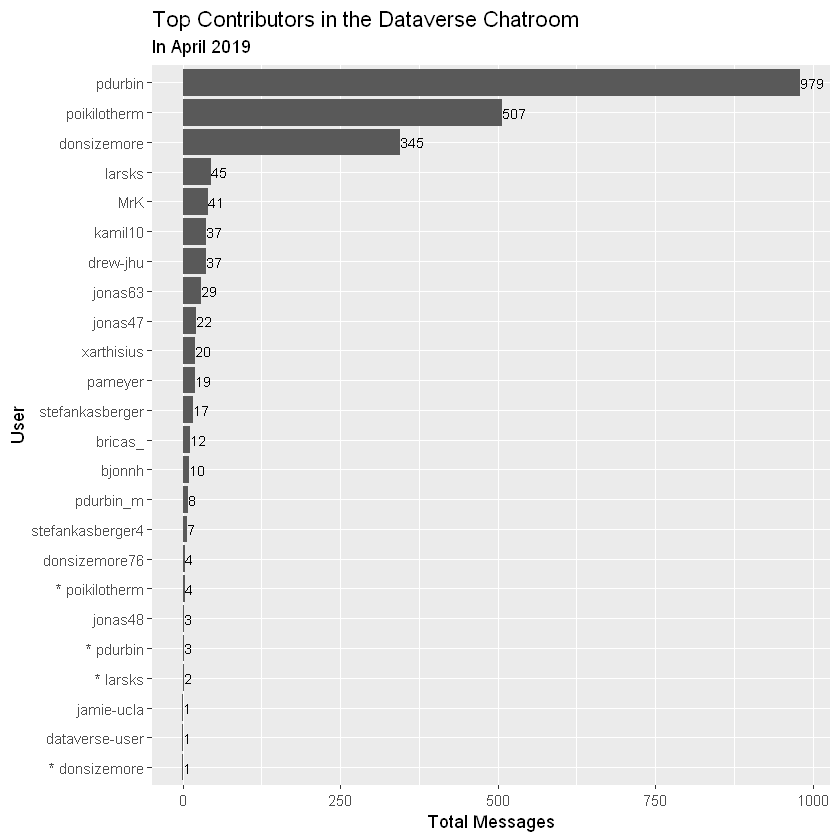

In [14]:
#Plot
ggplot(superusers, aes(x=superusers$Var1, y=superusers$Freq, label=superusers$Freq)) +
    geom_col() +
    coord_flip() +
    geom_text(size=3, hjust="bottom") +
    labs(title="Top Contributors in the Dataverse Chatroom", subtitle=paste("In", month, year), x="User", y="Total Messages")

In [15]:
superusers

,Var1,Freq
,<fct>,<int>
20,pdurbin,979
22,poikilotherm,507
9,donsizemore,345
17,larsks,45
18,MrK,41
11,drew-jhu,37
16,kamil10,37
15,jonas63,29
13,jonas47,22
